## Importing Libraries

In [1]:
import os
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

## Loading Data

In [3]:
df = pd.read_csv('/content/drive/MyDrive/data-training.csv')
df.head(10)

,askRate0,askRate1,askRate2,askRate3,askRate4,askRate5,askRate6,askRate7,askRate8,askRate9,askRate10,askRate11,askRate12,askRate13,askRate14,askSize0,askSize1,askSize2,askSize3,askSize4,askSize5,askSize6,askSize7,askSize8,askSize9,askSize10,askSize11,askSize12,askSize13,askSize14,bidRate0,bidRate1,bidRate2,bidRate3,bidRate4,bidRate5,bidRate6,bidRate7,bidRate8,bidRate9,bidRate10,bidRate11,bidRate12,bidRate13,bidRate14,bidSize0,bidSize1,bidSize2,bidSize3,bidSize4,bidSize5,bidSize6,bidSize7,bidSize8,bidSize9,bidSize10,bidSize11,bidSize12,bidSize13,bidSize14,y
0,1619.5,1620.0,1621.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,10.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
1,1619.5,1620.0,1621.0,1621.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,10.0,24.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
2,1619.5,1620.0,1621.0,1621.5,1622.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,10.0,24.0,5.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
3,1619.5,1620.0,1621.0,1621.5,1622.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,10.0,24.0,5.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
4,1619.5,1620.0,1621.0,1621.5,1622.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,10.0,24.0,5.0,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
5,1619.5,1620.0,1621.0,1621.5,1622.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,10.0,24.0,5.0,152.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
6,1619.5,1620.0,1621.0,1621.5,1622.0,1623.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,10.0,24.0,5.0,152.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
7,1619.5,1620.0,1621.0,1621.5,1622.0,1623.0,1623.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,10.0,24.0,5.0,152.0,10.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
8,1619.5,1620.0,1621.0,1621.5,1622.0,1623.0,1623.5,1624.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,10.0,24.0,5.0,152.0,10.0,2.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
9,1619.5,1620.0,1621.0,1621.5,1622.0,1623.0,1623.5,1624.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,10.0,24.0,5.0,152.0,10.0,2.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5


In [4]:
df.tail(10)

,askRate0,askRate1,askRate2,askRate3,askRate4,askRate5,askRate6,askRate7,askRate8,askRate9,askRate10,askRate11,askRate12,askRate13,askRate14,askSize0,askSize1,askSize2,askSize3,askSize4,askSize5,askSize6,askSize7,askSize8,askSize9,askSize10,askSize11,askSize12,askSize13,askSize14,bidRate0,bidRate1,bidRate2,bidRate3,bidRate4,bidRate5,bidRate6,bidRate7,bidRate8,bidRate9,bidRate10,bidRate11,bidRate12,bidRate13,bidRate14,bidSize0,bidSize1,bidSize2,bidSize3,bidSize4,bidSize5,bidSize6,bidSize7,bidSize8,bidSize9,bidSize10,bidSize11,bidSize12,bidSize13,bidSize14,y
2999989,1583.5,1584.0,1584.5,1585.0,1585.5,1586.0,1586.5,1587.0,1587.5,1588.0,1588.5,1589.0,1589.5,1590.0,1591.0,5.0,12.0,10.0,17.0,8.0,9.0,7.0,8.0,20.0,9.0,6.0,2.0,43.0,12.0,1.0,1583.0,1582.5,1582.0,1581.5,1581.0,1580.5,1580.0,1579.5,1579.0,1578.5,1578.0,1577.5,1577.0,1576.0,1575.5,4.0,15.0,10.0,10.0,36.0,20.0,64.0,13.0,28.0,44.0,95.0,2.0,3.0,26.0,3.0,0.5
2999990,1583.5,1584.0,1584.5,1585.0,1585.5,1586.0,1586.5,1587.0,1587.5,1588.0,1588.5,1589.0,1589.5,1590.0,1591.0,5.0,12.0,10.0,17.0,8.0,9.0,7.0,8.0,20.0,9.0,6.0,2.0,43.0,12.0,1.0,1583.0,1582.5,1582.0,1581.5,1581.0,1580.5,1580.0,1579.5,1579.0,1578.5,1578.0,1577.5,1577.0,1576.0,1575.5,3.0,15.0,10.0,10.0,36.0,20.0,64.0,13.0,28.0,44.0,95.0,2.0,3.0,26.0,3.0,0.5
2999991,1583.5,1584.0,1584.5,1585.0,1585.5,1586.0,1586.5,1587.0,1587.5,1588.0,1588.5,1589.0,1589.5,1590.0,1591.0,5.0,12.0,10.0,17.0,8.0,9.0,7.0,8.0,20.0,9.0,6.0,2.0,43.0,12.0,1.0,1583.0,1582.5,1582.0,1581.5,1581.0,1580.5,1580.0,1579.5,1579.0,1578.5,1578.0,1577.5,1577.0,1576.0,1575.5,4.0,15.0,10.0,10.0,36.0,20.0,64.0,13.0,28.0,44.0,95.0,2.0,3.0,26.0,3.0,0.5
2999992,1583.5,1584.0,1584.5,1585.0,1585.5,1586.0,1586.5,1587.0,1587.5,1588.0,1588.5,1589.0,1589.5,1590.0,1591.0,5.0,12.0,8.0,17.0,8.0,9.0,7.0,8.0,20.0,9.0,6.0,2.0,43.0,12.0,1.0,1583.0,1582.5,1582.0,1581.5,1581.0,1580.5,1580.0,1579.5,1579.0,1578.5,1578.0,1577.5,1577.0,1576.0,1575.5,4.0,15.0,10.0,10.0,36.0,20.0,64.0,13.0,28.0,44.0,95.0,2.0,3.0,26.0,3.0,0.5
2999993,1583.5,1584.0,1584.5,1585.0,1585.5,1586.0,1586.5,1587.0,1587.5,1588.0,1588.5,1589.0,1589.5,1590.0,1591.0,7.0,12.0,8.0,17.0,8.0,9.0,7.0,8.0,20.0,9.0,6.0,2.0,43.0,12.0,1.0,1583.0,1582.5,1582.0,1581.5,1581.0,1580.5,1580.0,1579.5,1579.0,1578.5,1578.0,1577.5,1577.0,1576.0,1575.5,4.0,15.0,10.0,10.0,36.0,20.0,64.0,13.0,28.0,44.0,95.0,2.0,3.0,26.0,3.0,0.5
2999994,1583.5,1584.0,1584.5,1585.0,1585.5,1586.0,1586.5,1587.0,1587.5,1588.0,1588.5,1589.0,1589.5,1590.0,1591.0,8.0,11.0,8.0,17.0,8.0,9.0,7.0,8.0,20.0,9.0,6.0,2.0,43.0,12.0,1.0,1583.0,1582.5,1582.0,1581.5,1581.0,1580.5,1580.0,1579.5,1579.0,1578.5,1578.0,1577.5,1577.0,1576.0,1575.5,4.0,15.0,10.0,10.0,36.0,20.0,64.0,13.0,28.0,44.0,95.0,2.0,3.0,26.0,3.0,0.5
2999995,1583.5,1584.0,1584.5,1585.0,1585.5,1586.0,1586.5,1587.0,1587.5,1588.0,1588.5,1589.0,1589.5,1590.0,1591.0,9.0,10.0,8.0,17.0,8.0,9.0,7.0,8.0,20.0,9.0,6.0,2.0,43.0,12.0,1.0,1583.0,1582.5,1582.0,1581.5,1581.0,1580.5,1580.0,1579.5,1579.0,1578.5,1578.0,1577.5,1577.0,1576.0,1575.5,4.0,15.0,10.0,10.0,36.0,20.0,64.0,13.0,28.0,44.0,95.0,2.0,3.0,26.0,3.0,0.5
2999996,1583.5,1584.0,1584.5,1585.0,1585.5,1586.0,1586.5,1587.0,1587.5,1588.0,1588.5,1589.0,1589.5,1590.0,1591.0,10.0,9.0,8.0,17.0,8.0,9.0,7.0,8.0,20.0,9.0,6.0,2.0,43.0,12.0,1.0,1583.0,1582.5,1582.0,1581.5,1581.0,1580.5,1580.0,1579.5,1579.0,1578.5,1578.0,1577.5,1577.0,1576.0,1575.5,4.0,15.0,10.0,10.0,36.0,20.0,64.0,13.0,28.0,44.0,95.0,2.0,3.0,26.0,3.0,0.5
2999997,1583.5,1584.0,1584.5,1585.0,1585.5,1586.0,1586.5,1587.0,1587.5,1588.0,1588.5,1589.0,1589.5,1590.0,1591.0,11.0,8.0,8.0,17.0,8.0,9.0,7.0,8.0,20.0,9.0,6.0,2.0,43.0,12.0,1.0,1583.0,1582.5,1582.0,1581.5,1581.0,1580.5,1580.0,1579.5,1579.0,1578.5,1578.0,1577.5,1577.0,1576.0,1575.5,4.0,15.0,10.0,10.0,36.0,20.0,64.0,13.0,28.0,44.0,95.0,2.0,3.0,26.0,3.0,0.5
2999998,1583.5,1584.0,1584.5,1585.0,1585.5,1586.0,1586.5,1587.0,1587.5,1588.0,1588.5,1589.0,1589.5,1590.0,1591.0,11.0,8.0,8.0,17.0,8.0,9.0,7.0,8.0,20.0,9.0,6.0,2.0,43.0,12.0,1.0,1583.0,1582.5,1582.0,1581.5,1581.0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999999 entries, 0 to 2999998
Data columns (total 61 columns):
 #   Column     Dtype  
---  ------     -----  
 0   askRate0   float64
 1   askRate1   float64
 2   askRate2   float64
 3   askRate3   float64
 4   askRate4   float64
 5   askRate5   float64
 6   askRate6   float64
 7   askRate7   float64
 8   askRate8   float64
 9   askRate9   float64
 10  askRate10  float64
 11  askRate11  float64
 12  askRate12  float64
 13  askRate13  float64
 14  askRate14  float64
 15  askSize0   float64
 16  askSize1   float64
 17  askSize2   float64
 18  askSize3   float64
 19  askSize4   float64
 20  askSize5   float64
 21  askSize6   float64
 22  askSize7   float64
 23  askSize8   float64
 24  askSize9   float64
 25  askSize10  float64
 26  askSize11  float64
 27  askSize12  float64
 28  askSize13  float64
 29  askSize14  float64
 30  bidRate0   float64
 31  bidRate1   float64
 32  bidRate2   float64
 33  bidRate3   float64
 34  bidRate4   float64

## Feature Engineering

In [6]:
df.isnull().sum()

askRate0       0
askRate1      36
askRate2      64
askRate3      97
askRate4     138
            ... 
bidSize11      0
bidSize12      0
bidSize13      0
bidSize14      0
y              0
Length: 61, dtype: int64

In [7]:
# Drop missing values
#df = df.dropna().reset_index(drop = True)
df = df.fillna(0)
df.head(10)

,askRate0,askRate1,askRate2,askRate3,askRate4,askRate5,askRate6,askRate7,askRate8,askRate9,askRate10,askRate11,askRate12,askRate13,askRate14,askSize0,askSize1,askSize2,askSize3,askSize4,askSize5,askSize6,askSize7,askSize8,askSize9,askSize10,askSize11,askSize12,askSize13,askSize14,bidRate0,bidRate1,bidRate2,bidRate3,bidRate4,bidRate5,bidRate6,bidRate7,bidRate8,bidRate9,bidRate10,bidRate11,bidRate12,bidRate13,bidRate14,bidSize0,bidSize1,bidSize2,bidSize3,bidSize4,bidSize5,bidSize6,bidSize7,bidSize8,bidSize9,bidSize10,bidSize11,bidSize12,bidSize13,bidSize14,y
0,1619.5,1620.0,1621.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
1,1619.5,1620.0,1621.0,1621.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,24.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
2,1619.5,1620.0,1621.0,1621.5,1622.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,24.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
3,1619.5,1620.0,1621.0,1621.5,1622.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,24.0,5.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
4,1619.5,1620.0,1621.0,1621.5,1622.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,24.0,5.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
5,1619.5,1620.0,1621.0,1621.5,1622.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,24.0,5.0,152.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
6,1619.5,1620.0,1621.0,1621.5,1622.0,1623.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,24.0,5.0,152.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
7,1619.5,1620.0,1621.0,1621.5,1622.0,1623.0,1623.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,24.0,5.0,152.0,10.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
8,1619.5,1620.0,1621.0,1621.5,1622.0,1623.0,1623.5,1624.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,24.0,5.0,152.0,10.0,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
9,1619.5,1620.0,1621.0,1621.5,1622.0,1623.0,1623.5,1624.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,24.0,5.0,152.0,10.0,2.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5


In [8]:
df['y'].unique()

array([-0.5 , -0.25,  0.  , -1.  , -1.25, -0.75, -1.5 ,  0.75,  0.5 ,
        0.25,  1.75,  1.  ,  1.5 ,  1.25,  2.  , -1.75,  2.25, -3.  ,
       -2.  , -2.5 , -2.25,  3.  ,  3.25,  3.5 ,  2.75,  2.5 , -3.5 ,
       -2.75, -3.25, -3.75, -4.  , -4.25, -4.75, -4.5 , -5.  ,  4.75,
        5.  ,  3.75,  4.  ,  4.5 ,  4.25])

In [9]:
df['price'] = df['y'].cumsum()
df.drop(['y'], axis = 1, inplace = True)
df.head(10)

,askRate0,askRate1,askRate2,askRate3,askRate4,askRate5,askRate6,askRate7,askRate8,askRate9,askRate10,askRate11,askRate12,askRate13,askRate14,askSize0,askSize1,askSize2,askSize3,askSize4,askSize5,askSize6,askSize7,askSize8,askSize9,askSize10,askSize11,askSize12,askSize13,askSize14,bidRate0,bidRate1,bidRate2,bidRate3,bidRate4,bidRate5,bidRate6,bidRate7,bidRate8,bidRate9,bidRate10,bidRate11,bidRate12,bidRate13,bidRate14,bidSize0,bidSize1,bidSize2,bidSize3,bidSize4,bidSize5,bidSize6,bidSize7,bidSize8,bidSize9,bidSize10,bidSize11,bidSize12,bidSize13,bidSize14,price
0,1619.5,1620.0,1621.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
1,1619.5,1620.0,1621.0,1621.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,24.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-1.0
2,1619.5,1620.0,1621.0,1621.5,1622.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,24.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-1.5
3,1619.5,1620.0,1621.0,1621.5,1622.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,24.0,5.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-2.0
4,1619.5,1620.0,1621.0,1621.5,1622.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,24.0,5.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-2.5
5,1619.5,1620.0,1621.0,1621.5,1622.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,24.0,5.0,152.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-3.0
6,1619.5,1620.0,1621.0,1621.5,1622.0,1623.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,24.0,5.0,152.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-3.5
7,1619.5,1620.0,1621.0,1621.5,1622.0,1623.0,1623.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,24.0,5.0,152.0,10.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-4.0
8,1619.5,1620.0,1621.0,1621.5,1622.0,1623.0,1623.5,1624.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,24.0,5.0,152.0,10.0,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-4.5
9,1619.5,1620.0,1621.0,1621.5,1622.0,1623.0,1623.5,1624.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,24.0,5.0,152.0,10.0,2.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1615.0,1614.0,1613.0,1612.0,1611.0,1610.0,1607.0,1606.0,1605.0,1604.0,1603.0,1602.0,1601.5,1601.0,1600.0,7.0,10.0,1.0,10.0,20.0,3.0,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-5.0


In [10]:
len(df)

2999999

In [11]:
train_rate = 0.6
val_rate = 0.2
int(len(df)*train_rate)

1799999

In [12]:
df_copy = df.iloc[:1000000].copy(deep = True)

In [13]:
# train, val, test split
df_train = df_copy.iloc[:int(len(df_copy)*train_rate)].copy(deep = True)
df_val = df_copy.iloc[int(len(df_copy)*train_rate):int(len(df_copy)*train_rate) + int(len(df_copy)*val_rate)].copy(deep = True)
df_test = df_copy.iloc[int(len(df_copy)*train_rate) + int(len(df_copy)*val_rate):].copy(deep = True)
print(df_train.shape)
print(df_val.shape)
print(df_test.shape)

(600000, 61)
(200000, 61)
(200000, 61)


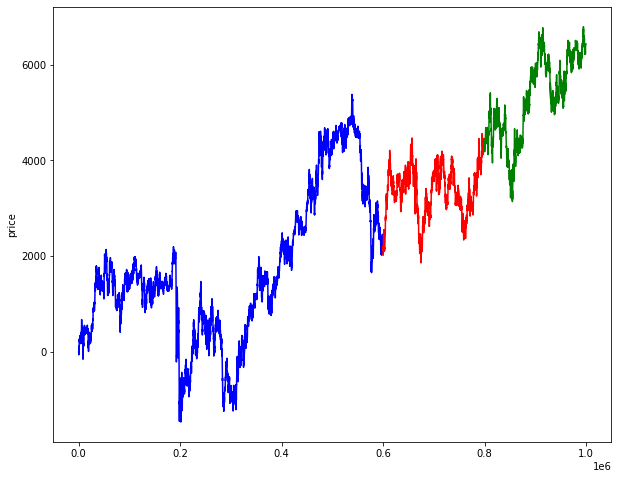

In [14]:
plt.figure(figsize = (10,8))
sns.lineplot(data = df_train['price'], color = 'blue')
sns.lineplot(data = df_val['price'], color = 'red' )
sns.lineplot(data = df_test['price'], color = 'green' )

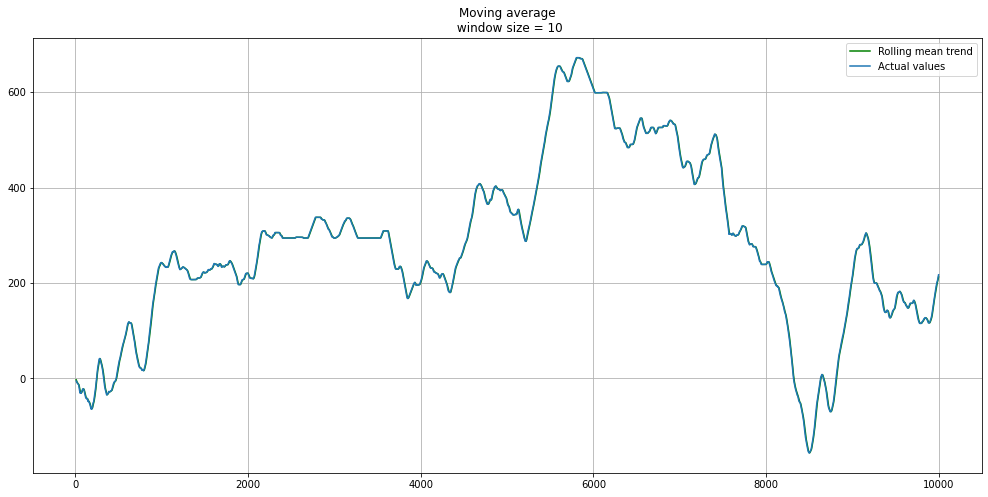

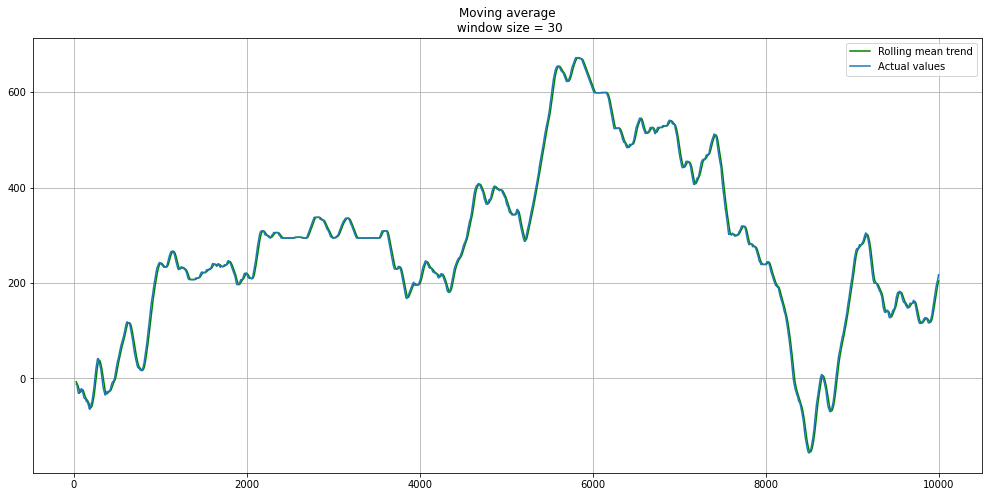

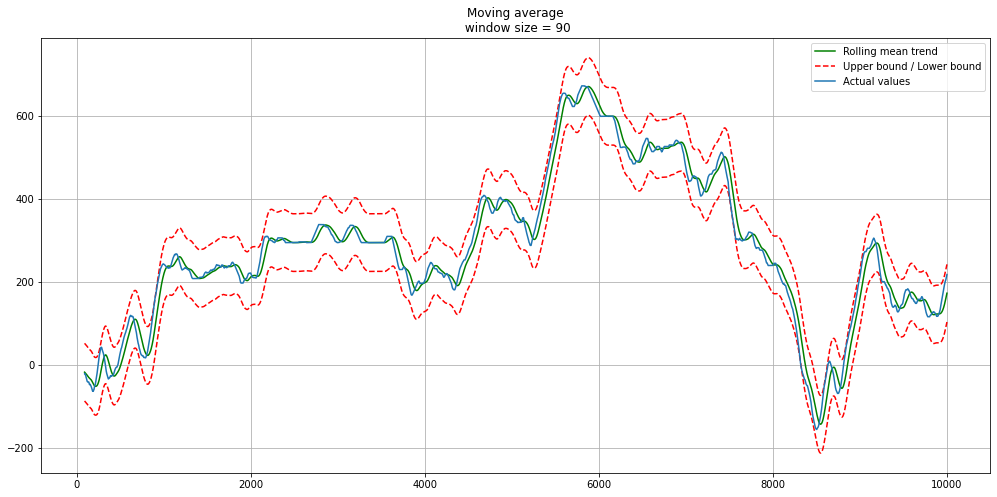

In [15]:
# moving average
from sklearn.metrics import mean_absolute_error
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):

    rolling_mean = series.rolling(window=window).mean()
    
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Rolling mean trend')
    
    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
            
    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)
    
#Smooth by the previous 5 days (by week)
plot_moving_average(df_train.price[:10000], 10)

#Smooth by the previous month (30 days)
plot_moving_average(df_train.price[:10000], 30)

#Smooth by previous quarter (90 days)
plot_moving_average(df_train.price[:10000], 90, plot_intervals=True)

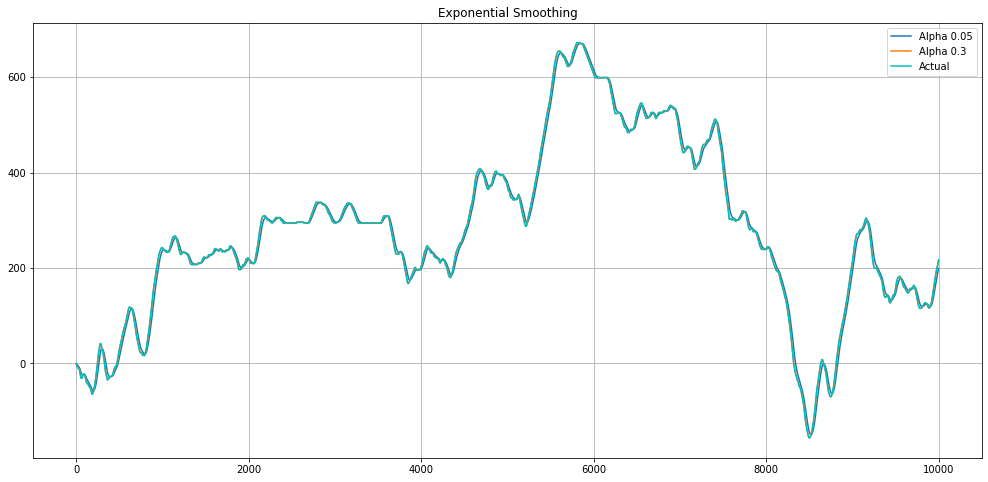

In [16]:
# exponential moving average
def exponential_smoothing(series, alpha):

    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result
  
def plot_exponential_smoothing(series, alphas):
 
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
    plt.plot(series.values, "c", label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Exponential Smoothing")
    plt.grid(True);

plot_exponential_smoothing(df_train.price[:10000], [0.05, 0.3])

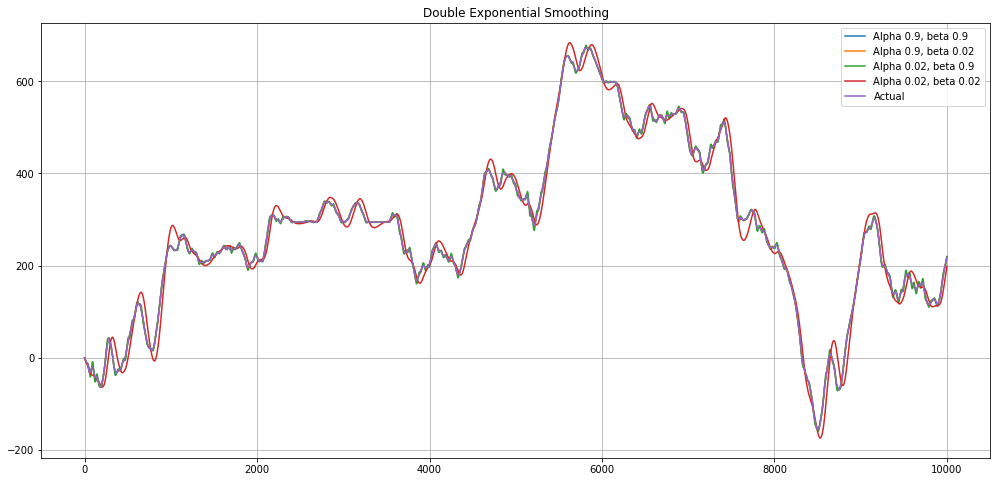

In [17]:
def double_exponential_smoothing(series, alpha, beta):

    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # forecasting
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha * value + (1 - alpha) * (level + trend)
        trend = beta * (level - last_level) + (1 - beta) * trend
        result.append(level + trend)
    return result

def plot_double_exponential_smoothing(series, alphas, betas):
     
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        for beta in betas:
            plt.plot(double_exponential_smoothing(series, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
    plt.plot(series.values, label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Double Exponential Smoothing")
    plt.grid(True)
    
plot_double_exponential_smoothing(df_train.price[:10000], alphas=[0.9, 0.02], betas=[0.9, 0.02])


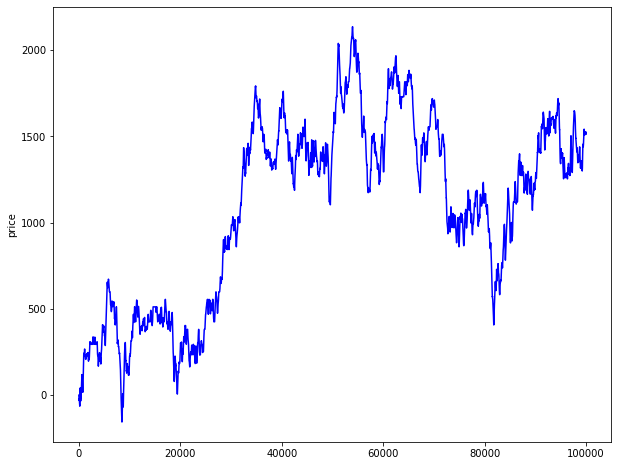

In [18]:
plt.figure(figsize = (10,8))
sns.lineplot(data = df_train['price'][:100000], color = 'blue')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


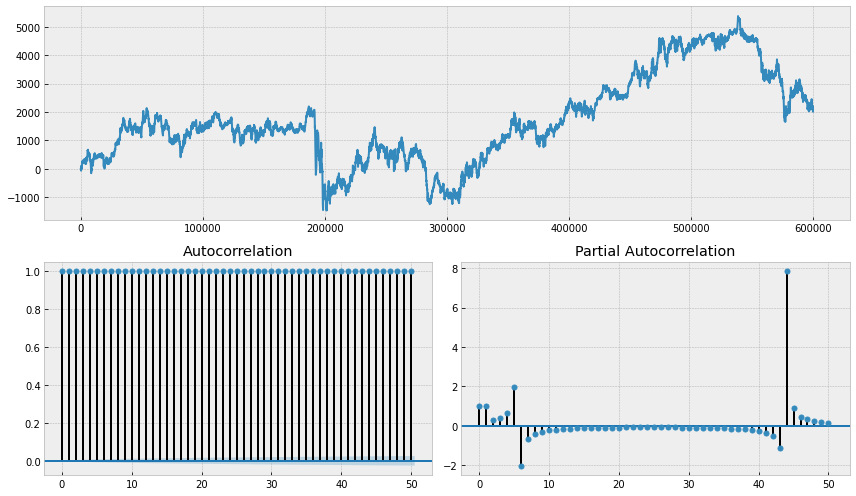

In [19]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))
        
        y.plot(ax=ts_ax)
        #p_value = adfuller(y)[1]
        #ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        plot_acf(y, lags=lags, ax=acf_ax)
        plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
        
tsplot(df_train.price, lags=50)

# Take the first difference to remove to make the process stationary
#data_diff = data.CLOSE - data.CLOSE.shift(1)

#tsplot(data_diff[1:], lags=30)

## Making Dataset

In [20]:
# scale the data
from sklearn.preprocessing import MinMaxScaler
mx = MinMaxScaler()
train = mx.fit_transform(df_train)
val = mx.transform(df_val)
test = mx.transform(df_test)

In [21]:
# making datasets
def make_dataset(data, lookback):
  X = []
  y = []
  for i in range(lookback, len(data)):
    sample  = data[i - lookback:i,:]
    target = data[i,-1]
    X.append(sample)
    y.append(target)
  X = np.asarray(X)
  y = np.asarray(y)  
  return (X, y)
X_train ,y_train = make_dataset(train, 10)  
X_val ,y_val = make_dataset(val, 10)  
X_test ,y_test = make_dataset(test, 10)  

In [22]:
X_train.shape

(599990, 10, 61)

## Modeling

In [26]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop, Adam
model = Sequential()
model.add(layers.GRU(32, input_shape=(10, 61), return_sequences = True))
model.add(layers.GRU(32))
model.add(layers.Dense(1))
model.compile(optimizer=Adam(), loss='mse')
history = model.fit(X_train, y_train, epochs=10, batch_size= 32, validation_data = (X_val, y_val))

Epoch 1/10
18750/18750 [==============================] - 109s 5ms/step - loss: 3.5745e-04 - val_loss: 4.8012e-06
Epoch 2/10
18750/18750 [==============================] - 87s 5ms/step - loss: 1.1460e-05 - val_loss: 6.7586e-06
Epoch 3/10
18750/18750 [==============================] - 86s 5ms/step - loss: 7.2749e-06 - val_loss: 2.5358e-06
Epoch 4/10
18750/18750 [==============================] - 86s 5ms/step - loss: 4.8724e-06 - val_loss: 1.9032e-06
Epoch 5/10
18750/18750 [==============================] - 90s 5ms/step - loss: 3.7443e-06 - val_loss: 6.9546e-07
Epoch 6/10
18750/18750 [==============================] - 90s 5ms/step - loss: 3.2429e-06 - val_loss: 2.2105e-06
Epoch 7/10
18750/18750 [==============================] - 91s 5ms/step - loss: 2.5983e-06 - val_loss: 2.4681e-06
Epoch 8/10
18750/18750 [==============================] - 89s 5ms/step - loss: 2.4908e-06 - val_loss: 5.3738e-07
Epoch 9/10
18750/18750 [==============================] - 85s 5ms/step - loss: 2.1030e-06 - val

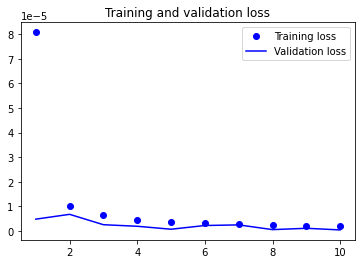

In [27]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [28]:
y_train_pred = model.predict(X_train, verbose=1)
y_val_pred = model.predict(X_val, verbose=1)
y_test_pred = model.predict(X_test, verbose=1)

6250/6250 [==============================] - 12s 2ms/step


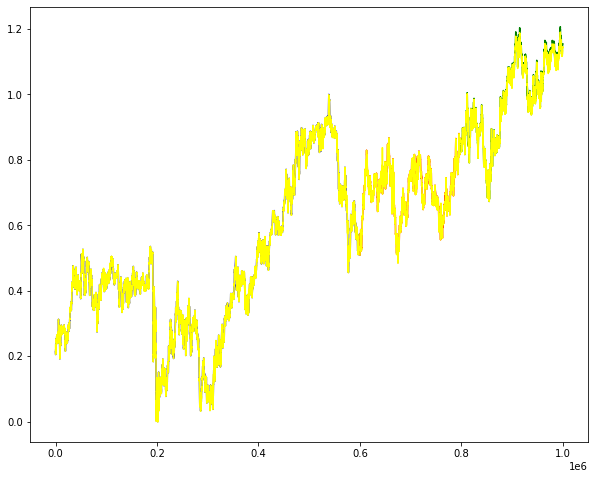

In [29]:
plt.figure(figsize = (10,8))
plt.plot(range(y_train.shape[0]), y_train, color = 'blue')
plt.plot(range(y_train.shape[0]), y_train_pred, color = 'yellow')
plt.plot(range(y_train.shape[0],y_train.shape[0]+y_val.shape[0]), y_val, color = 'red')
plt.plot(range(y_train.shape[0],y_train.shape[0]+y_val.shape[0]), y_val_pred, color = 'yellow')
plt.plot(range(y_train.shape[0]+y_val.shape[0], y_train.shape[0]+y_val.shape[0]+y_test.shape[0]), y_test, color = 'green')
plt.plot(range(y_train.shape[0]+y_val.shape[0], y_train.shape[0]+y_val.shape[0]+y_test.shape[0]), y_test_pred, color = 'yellow')

In [30]:
y_train_pred[0]

array([0.23466617], dtype=float32)

In [31]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_test_pred))

0.9985611516358137
